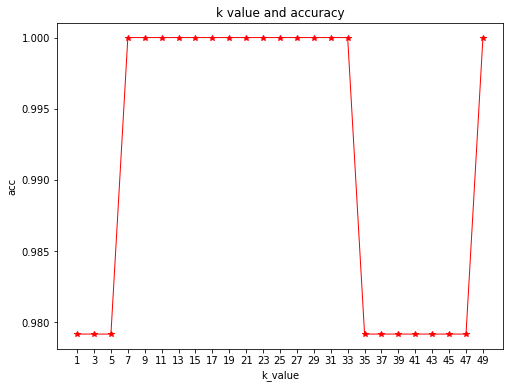

精确率最高的k值： 7 精确率： 1.0


In [7]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
from csv import reader

class KNN():
    #--------------初始化参数k(最近邻个数)------------#
    def __init__(self,k=5):
        self.k = k
        
    def euclidean_distance1(self,one_x_test,x_dev):
        x_standard = np.std(x_dev, axis=0)
        x_standard = x_standard.reshape(1,-1)
        one_x_test = one_x_test.reshape(1,-1)
        x_dev = x_dev.reshape(x_dev.shape[0],-1)
        x_test = np.tile(one_x_test,(x_dev.shape[0],1))
        x_std = np.tile(x_standard,(x_dev.shape[0],1))
        distance = np.sqrt(np.power((x_test - x_dev)/x_std,2).sum(axis=1))   
        return distance   
    def euclidean_distance(self,one_sample,X_train):#计算一个测试样本与所有训练样本的欧氏距离
        #将测试样本变成只有1行
        distance_arr = []
        for x in X_train:
            distance = 1- np.dot(one_sample,x)/(np.linalg.norm(one_sample)*(np.linalg.norm(x)))
            distance_arr.append(distance)
        return distance_arr
    #------------------计算欧氏距离-----------------#
    def euclidean_distance3(self,one_sample,X_train):#计算一个测试样本与所有训练样本的欧氏距离
        #将测试样本变成只有1行
        one_sample = one_sample.reshape(1,-1)
        X_train = X_train.reshape(X_train.shape[0],-1)
        #将测试样本沿y轴复制，使其行数等于训练样本行数
        X_test = np.tile(one_sample,(X_train.shape[0],1))
        #计算测试样本与每一个训练样本的欧氏距离
        distance_arr = np.sqrt(np.power(X_test - X_train,2).sum(axis=1))
        return distance_arr
    #-------------获取最近k个近邻的标签------------#
    def get_k_neighbor_labels(self,distances,y_train,k):
        k_neighbor_labels = []
        #按照距离排序选择前k个获取标签
        for distance in np.sort(distances)[:k]:
            label = y_train[distances==distance]
            k_neighbor_labels.extend(label)
        #将返回k个近邻标签列表转为数组，并只有一行
        return np.array(k_neighbor_labels).reshape(-1, )
    #-------------投票得到某样本的类别------------#
    def vote(self,one_sample,X_train,y_train,k):
        #获取测试集所有样本与训练集欧氏距离的数组
        Distances = self.euclidean_distance(one_sample,X_train)
        y_train = y_train.reshape(y_train.shape[0],1)
        #获取最近k个近邻的标签数组
        self.knn_labels_arr = self.get_k_neighbor_labels(Distances,y_train,k)
        #初始化标签和数
        find_label,find_count = 0,0
        #使用Counter统计每个标签出现次数，label为标签，count为标签出现次数
        for label,count in Counter(self.knn_labels_arr).items():
            if count > find_count:
                find_count = count
                find_label = label
        return find_label
    #-------------------预测---------------------#
    def predict(self,X_test,X_train,y_train):
        y_pred = []
        #获取每个测试样本的预测标签
        for sample in X_test:
            label = self.vote(sample,X_train,y_train,self.k)
            y_pred.append(label)
        return np.array(y_pred)
    #-----------------求预测精确度------------------#
    def accuracy(self,y,y_pred):
        y=y.reshape(y.shape[0],-1)
        y_pred=y_pred.reshape(y_pred.shape[0],-1)
        return np.sum(y==y_pred)/len(y)
    
class KnnFunction():
    #根据k取值列表，计算各取值的精确率
    def K_acc(self,X_train,X_test,y_train,y_test,k_arr):
        self.k_value = k_arr
        self.accu_value=[]
        self.accu_best,self.k_best = 0, 0
        for k in self.k_value:
            model = KNN(k)
            y_pred = model.predict(X_test,X_train,y_train)
            accu = model.accuracy(y_test,y_pred)
            if accu > self.accu_best:
                self.k_best = k
                self.accu_best = accu
            self.accu_value.append(accu)
    #绘制k-acc图
    def plot_K_acc(self):
        figure = plt.figure(figsize=(8,6))
        ax = figure.add_subplot(1,1,1)
        ax.plot(self.k_value,self.accu_value,color='red',marker='*',lw=1)
        plt.xticks(self.k_value, rotation=0) 
        ax.set_xlabel(r"k_value")
        ax.set_ylabel(r"acc")
        ax.set_title("k value and accuracy")
        plt.show()
def loadDataset(filename,split):
    trainingSet=[]
    testSet = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        dataset = list(csv_reader)
        for x in range(len(dataset)-1):  
            for y in range(4):  
                dataset[x][y] = float(dataset[x][y])  
            if random.random()<split:  
                trainingSet.append(dataset[x])  
            else:  
                testSet.append(dataset[x])
    y_dev = np.array([xx.pop(-1) for xx in trainingSet])
    x_dev = np.array(trainingSet)
    y_test = np.array([xx.pop(-1) for xx in testSet])
    x_test = np.array(testSet)
    return x_dev,x_test,y_dev,y_test        
split = 0.67      #分割的比例  
x_dev,x_test,y_dev,y_test=loadDataset("iris.data", split)

k_value = np.arange(1,51,2).tolist()
##加载最近邻模型
KF = KnnFunction()
KF.K_acc(x_dev,x_test,y_dev,y_test,k_value)
KF.plot_K_acc()
print("精确率最高的k值：",KF.k_best,"精确率：",KF.accu_best)


In [24]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
from csv import reader

def loadDataset(filename,split):
    trainingSet=[]
    testSet = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        dataset = list(csv_reader)
        for x in range(len(dataset)-1):  
            for y in range(4):  
                dataset[x][y] = float(dataset[x][y])  
            if random.random()<split:  
                trainingSet.append(dataset[x])  
            else:  
                testSet.append(dataset[x])
    y_dev = np.array([xx.pop(-1) for xx in trainingSet])
    x_dev = np.array(trainingSet)
    y_test = np.array([xx.pop(-1) for xx in testSet])
    x_test = np.array(testSet)
    return x_dev,x_test,y_dev,y_test

def get_k_neighbor_labels(distances,y_train,k):
    k_neighbor_labels = []
    #按照距离排序选择前k个获取标签
    for distance in np.sort(distances)[:k]:
        label = y_train[distances==distance]
        k_neighbor_labels.extend(label)
    #将返回k个近邻标签列表转为数组，并只有一行
    return np.array(k_neighbor_labels).reshape(-1, )

def vote(one_sample,X_train,y_train,k):
    #获取测试集所有样本与训练集欧氏距离的数组
    Distances = euclidean_distance(one_sample,X_train)
    y_train = y_train.reshape(y_train.shape[0],1)
    #获取最近k个近邻的标签数组
    knn_labels_arr = get_k_neighbor_labels(Distances,y_train,k)
    #初始化标签和数
    find_label,find_count = 0,0
    #使用Counter统计每个标签出现次数，label为标签，count为标签出现次数
    for label,count in Counter(knn_labels_arr).items():
        if count > find_count:
            find_count = count
            find_label = label
    return find_label
#-------------------预测---------------------#
def predict(X_test,X_train,y_train):
    y_pred = []
    #获取每个测试样本的预测标签
    for sample in X_test:
        label = vote(sample,X_train,y_train,k)
        y_pred.append(label)
    return np.array(y_pred)
#-----------------求预测精确度------------------#
def accuracy(y,y_pred):
    y=y.reshape(y.shape[0],-1)
    y_pred=y_pred.reshape(y_pred.shape[0],-1)
    return np.sum(y==y_pred)/len(y)

def K_acc(X_train,X_test,y_train,y_test,k_arr):
    k_value = k_arr
    accu_value=[]
    accu_best,k_best = 0, 0
    for k in k_value:
        y_pred = predict(X_test,X_train,y_train)
        accu = accuracy(y_test,y_pred)
        if accu > accu_best:
            k_best = k
            accu_best = accu
        accu_value.append(accu)
         
split = 0.67      #分割的比例  
x_dev,x_test,y_dev,y_test=loadDataset("iris.data", split)
print("Train set" + repr(len(x_dev)))  
print("Test set"+ repr(len(y_dev)))
print(x_dev)  
print(y_dev) 
k_value = np.arange(1,22,2).tolist()
K_acc(X_train,X_test,y_train,y_test,k_value)

Train set97
Test set97
[[5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.4 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.